In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from wordcloud import WordCloud

In [2]:
raw_data = pd.read_csv("imdb-reviews-pt-br.csv")
raw_data.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
raw_data = raw_data.replace(["neg", "pos"], [0,1])

In [4]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase = False)
bag_of_words = vetorizar.fit_transform(texto)

# DataFrame.sparse.from_spmatrix


In [5]:
vetorizar.get_feature_names_out()

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [6]:
matriz = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


## Testando para o Dataframe

In [7]:
vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vetorizar.fit_transform(raw_data.text_pt)
bag_of_words.shape

(49459, 50)

In [8]:
df = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
df.head()

,Eu,ao,apenas,as,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,0,1,0,0,2,1,0,4,4,2,...,1,1,0,0,0,1,0,3,2,0
1,0,0,0,0,2,0,0,7,1,2,...,1,0,0,2,0,1,0,4,2,1
2,1,0,0,0,3,1,0,10,2,0,...,0,0,0,3,1,0,1,3,2,2
3,2,0,1,4,7,2,1,13,3,1,...,0,0,0,1,0,1,0,7,4,1
4,0,0,1,2,3,0,1,16,2,1,...,0,0,0,4,0,0,0,3,4,0


### Baseline

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df, raw_data.sentiment, random_state = 42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acuracia = accuracy_score(y_test, y_pred)
print(acuracia)

0.6583097452486858


In [10]:
def classificar_texto(raw_data, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase = False, max_features = 50)
    bag_of_words = vetorizar.fit_transform(raw_data[coluna_texto])
    x_train, x_test, y_train, y_test = train_test_split(bag_of_words, raw_data[coluna_classificacao], random_state = 42)

    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acuracia = accuracy_score(y_test, y_pred)
    print(acuracia)

In [11]:
classificar_texto(raw_data, "text_pt", "sentiment")

0.6583097452486858


### Pequeno experimento

In [12]:
vetorizar = CountVectorizer(lowercase = True, max_features = 5000)
bag_of_words = vetorizar.fit_transform(raw_data.text_pt)
df = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
top_palavras = pd.Series(df[raw_data.sentiment == 0].sum() - df[raw_data.sentiment == 1].sum()).abs().sort_values(ascending = False).iloc[:50]
top_palavras

não          24530
que          11230
eu            9198
filme         8929
ruim          7401
isso          7258
da            6161
sua           6120
eles          5176
ou            5009
em            4681
como          4647
nada          4620
pior          4557
dos           4335
ter           4258
também        4219
seu           4188
horrível      3874
apenas        3868
sem           3829
ele           3757
tão           3435
coisa         3358
esse          3351
era           3265
mais          3163
vida          3157
história      3111
nem           3107
por           3091
ser           3011
se            2958
minutos       2936
parece        2934
excelente     2912
enredo        2883
então         2866
poderia       2862
menos         2765
mal           2708
fazer         2678
ao            2663
foi           2648
terrível      2640
ótimo         2640
bem           2636
anos          2535
estava        2453
há            2440
dtype: Sparse[int64, 0]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df[top_palavras.index], raw_data.sentiment, random_state = 42)

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acuracia = accuracy_score(y_test, y_pred)
print(acuracia)

0.7585928022644561


## WordCloud

### Geral

In [14]:
%matplotlib inline

todas_palavras = " ".join(list(raw_data.text_pt))
nuvem_palavras = WordCloud(width = 800, height=500, max_font_size = 110, collocations = False).generate(todas_palavras)

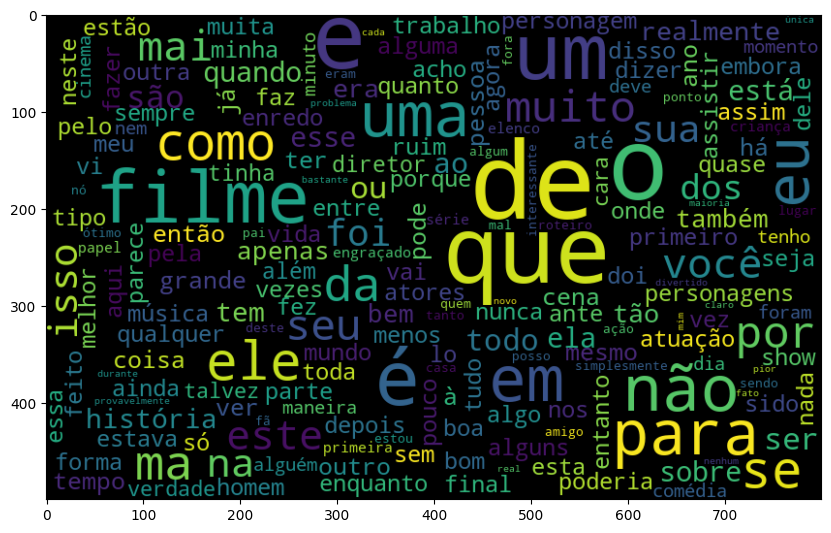

In [15]:
plt.figure(figsize = (10,7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.show()

### Negativos

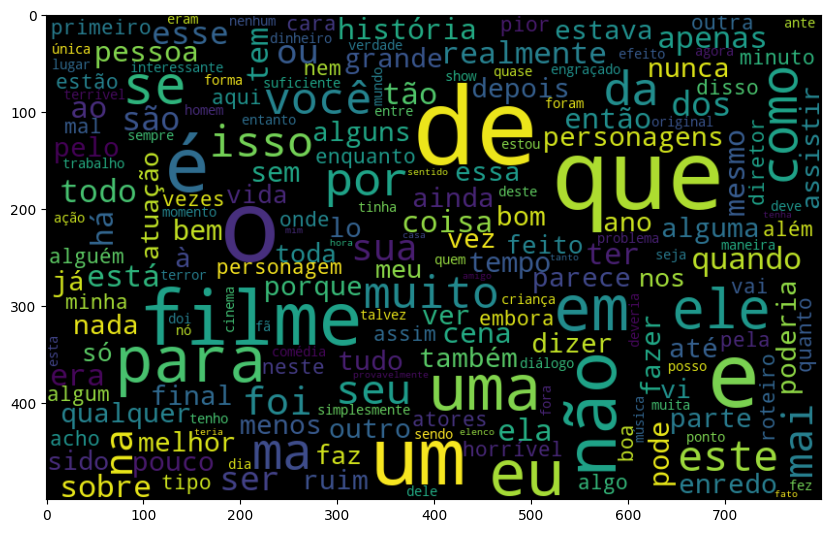

In [16]:
%matplotlib inline

todas_palavras = " ".join(list(raw_data.query("sentiment == 0").text_pt))
nuvem_palavras = WordCloud(width = 800, height=500, max_font_size = 110, collocations = False).generate(todas_palavras)

plt.figure(figsize = (10,7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.show()

### Positivos

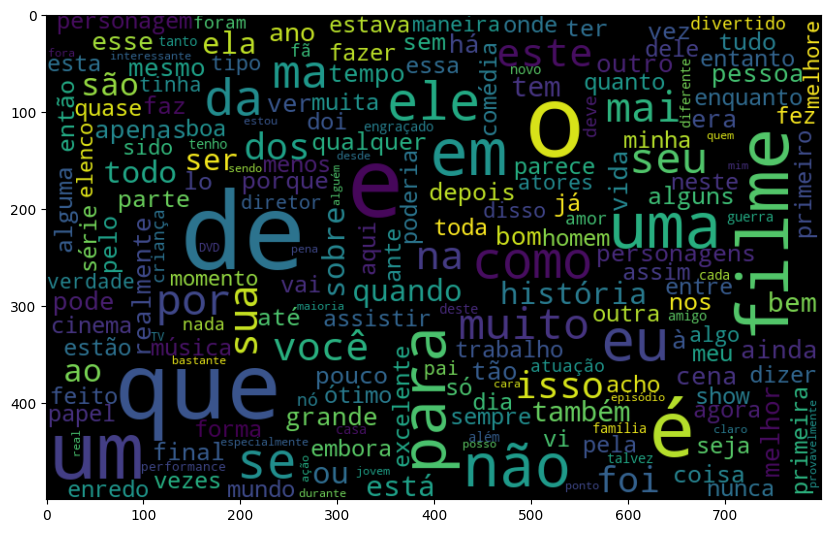

In [17]:
%matplotlib inline

todas_palavras = " ".join(list(raw_data.query("sentiment == 1").text_pt))
nuvem_palavras = WordCloud(width = 800, height=500, max_font_size = 110, collocations = False).generate(todas_palavras)

plt.figure(figsize = (10,7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.show()

## NLTK

In [18]:
import nltk
from nltk import tokenize

In [19]:
texto_total = " ".join(list(raw_data.text_pt))
tokenizer = tokenize.WhitespaceTokenizer()
texto_tokenizado = tokenizer.tokenize(texto_total)
frequencia = nltk.FreqDist(texto_tokenizado)

In [20]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
              "Frequencia": list(frequencia.values())})

In [21]:
df_frequencia.nlargest(10, columns = "Frequencia")

,Palavra,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


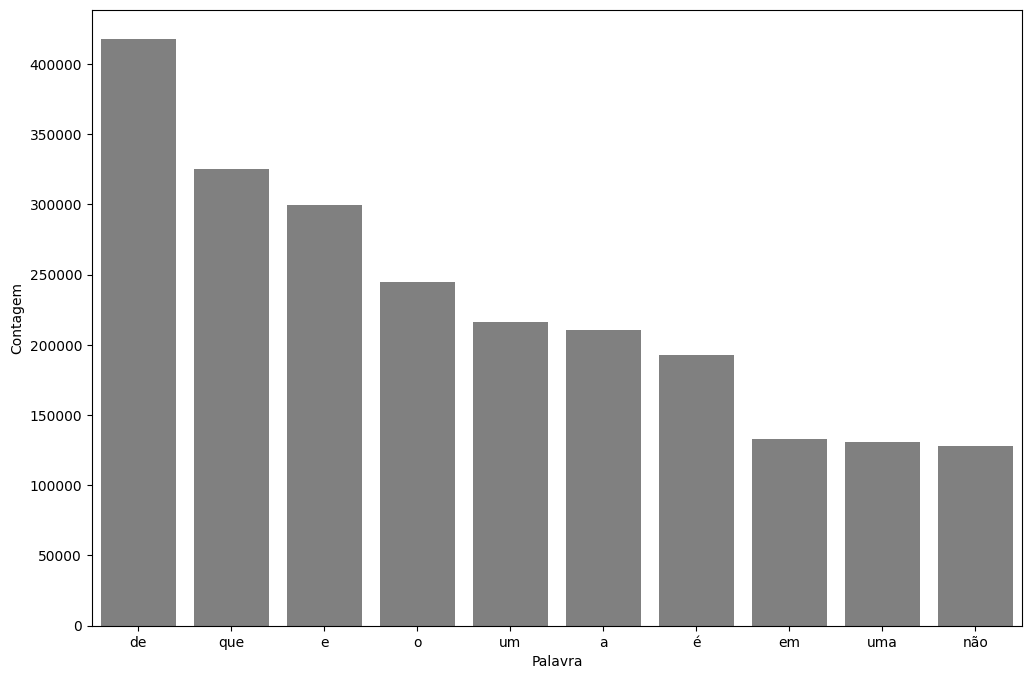

In [22]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia.nlargest(10, columns = "Frequencia"), x = "Palavra", y = "Frequencia", color = "gray")
ax.set(ylabel = "Contagem")
plt.show()

## Removendo Stop Words

In [23]:
stop_words = nltk.corpus.stopwords.words("portuguese")
print(stop_words)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [24]:
def tratar_frase(frase):
    stop_words = nltk.corpus.stopwords.words("portuguese")
    nova_frase = []
    tokenizer = tokenize.WhitespaceTokenizer()
    palavras_separadas = tokenizer.tokenize(frase)
    for palavra in palavras_separadas:
        if palavra not in stop_words:
            nova_frase.append(palavra)
    return " ".join(nova_frase)

raw_data["tratamento_1"] = raw_data["text_pt"].apply(tratar_frase)

In [25]:
raw_data.head()

,id,text_en,text_pt,sentiment,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve..."


### Testando na baseline

In [26]:
classificar_texto(raw_data, "tratamento_1", "sentiment")

0.6810351799433886


### Pequeno experimento

In [27]:
vetorizar = CountVectorizer(lowercase = True, max_features = 5000)
bag_of_words = vetorizar.fit_transform(raw_data.tratamento_1)
df = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
top_palavras = pd.Series(df[raw_data.sentiment == 0].sum() - df[raw_data.sentiment == 1].sum()).abs().sort_values(ascending = False).iloc[:50]
top_palavras

filme           8929
ruim            7401
não             5019
nada            4620
pior            4557
ter             4258
horrível        3874
apenas          3868
tão             3435
coisa           3358
isso            3350
vida            3157
história        3111
minutos         2936
parece          2934
excelente       2912
enredo          2883
então           2866
poderia         2862
menos           2765
mal             2708
fazer           2678
terrível        2640
ótimo           2640
bem             2636
anos            2535
sido            2415
eu              2368
atuação         2367
qualquer        2287
porque          2266
grande          2160
dizer           2158
algum           2125
por             2088
realmente       2078
nenhum          1989
roteiro         1985
alguém          1968
ainda           1906
cara            1905
melhores        1899
sempre          1890
ruins           1889
lixo            1885
amor            1868
ele             1845
simplesmente 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(df[top_palavras.index], raw_data.sentiment, random_state = 42)

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acuracia = accuracy_score(y_test, y_pred)
print(acuracia)

0.7625556004852406


## Removendo pontuações

In [29]:
from nltk import tokenize

frase = "Olá, Mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Olá', ',', 'Mundo', '!']


In [30]:
from string import punctuation

def tratar_frase2(frase):
    stop_words = nltk.corpus.stopwords.words("portuguese") + list(punctuation)
    nova_frase = []
    tokenizer = tokenize.WordPunctTokenizer()
    palavras_separadas = tokenizer.tokenize(frase)
    for palavra in palavras_separadas:
        if palavra not in stop_words:
            nova_frase.append(palavra)
    return " ".join(nova_frase)

raw_data["tratamento_2"] = raw_data["tratamento_1"].apply(tratar_frase2)

In [31]:
raw_data.head()

,id,text_en,text_pt,sentiment,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


## Removendo Acentos

In [32]:
import unidecode

acentos = "péssimo ótimo não"

teste = unidecode.unidecode(acentos)
print(teste)

pessimo otimo nao


In [40]:
def tratar_frase3(frase):
    frase = unidecode.unidecode(frase)
    stop_words = nltk.corpus.stopwords.words("portuguese") + list(punctuation)
    stop_words = list(map(lambda x: unidecode.unidecode(x), stop_words))
    nova_frase = []
    tokenizer = tokenize.WordPunctTokenizer()
    palavras_separadas = tokenizer.tokenize(frase)
    for palavra in palavras_separadas:
        if palavra not in stop_words:
            nova_frase.append(palavra)
    return " ".join(nova_frase)

raw_data["tratamento_3"] = raw_data["tratamento_2"].apply(tratar_frase3)

In [41]:
raw_data.head()

,id,text_en,text_pt,sentiment,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


### Testando na baseline

In [42]:
classificar_texto(raw_data, "tratamento_3", "sentiment")

0.6887990295188031


## Deixando tudo minúsculo

In [43]:
def tratar_frase4(frase):
    frase = unidecode.unidecode(frase).lower()
    stop_words = nltk.corpus.stopwords.words("portuguese") + list(punctuation)
    stop_words = list(map(lambda x: unidecode.unidecode(x), stop_words))
    nova_frase = []
    tokenizer = tokenize.WordPunctTokenizer()
    palavras_separadas = tokenizer.tokenize(frase)
    for palavra in palavras_separadas:
        if palavra not in stop_words:
            nova_frase.append(palavra)
    return " ".join(nova_frase)

raw_data["tratamento_4"] = raw_data["tratamento_3"].apply(tratar_frase4)

In [44]:
raw_data.head()

,id,text_en,text_pt,sentiment,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


### Testando na baseline

In [45]:
classificar_texto(raw_data, "tratamento_4", "sentiment")

0.688071168621108


## Lematização

In [46]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Pichau\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [47]:
stemmer = nltk.RSLPStemmer()
stemmer.stem("corredor")

'corr'

In [48]:
def tratar_frase5(frase):
    stemmer = nltk.RSLPStemmer()
    frase = unidecode.unidecode(frase).lower()
    stop_words = nltk.corpus.stopwords.words("portuguese") + list(punctuation)
    stop_words = list(map(lambda x: unidecode.unidecode(x), stop_words))
    nova_frase = []
    tokenizer = tokenize.WordPunctTokenizer()
    palavras_separadas = tokenizer.tokenize(frase)
    for palavra in palavras_separadas:
        if palavra not in stop_words:
            nova_frase.append(stemmer.stem(palavra))
    return " ".join(nova_frase)

In [49]:
raw_data["tratamento_5"] = raw_data["tratamento_4"].apply(tratar_frase5)

### Testando na baseline

In [50]:
classificar_texto(raw_data, "tratamento_5", "sentiment")

0.6955923978972908


### Outro experimento

In [53]:
vetorizar = CountVectorizer(lowercase = True, max_features = 5000)
bag_of_words = vetorizar.fit_transform(raw_data.tratamento_5)
df = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
soma_negativos = df[raw_data.sentiment == 0].sum()
soma_positivos = df[raw_data.sentiment == 1].sum()
soma_total = soma_negativos + soma_positivos
#top_palavras = pd.Series(df[raw_data.sentiment == 0].sum() - df[raw_data.sentiment == 1].sum()).abs().sort_values(ascending = False).iloc[:50]


In [64]:
proporcao_negativos = soma_negativos / soma_total
proporcao_positivos = soma_positivos / soma_total
top_palavras = proporcao_positivos.combine(proporcao_negativos, max)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(df[top_palavras.index], raw_data.sentiment, random_state = 42)

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acuracia = accuracy_score(y_test, y_pred)
print(acuracia)

C:\Users\Pichau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8624342903356248


In [66]:
# ótimos resultados e necessidade de otimizar os hiperparametros

## TF-IDF

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]
tfidf = TfidfVectorizer(lowercase = False, max_features=50)
caracteristicas = tfidf.fit_transform(frases)
df = pd.DataFrame(caracteristicas.todense(), columns = tfidf.get_feature_names_out())
df

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [70]:
def classificar_tfidf(raw_data, coluna_texto, coluna_classificacao):
    vetorizar = TfidfVectorizer(lowercase = False, max_features= 50)
    tfidf_bruto = vetorizar.fit_transform(raw_data[coluna_texto])
    x_train, x_test, y_train, y_test = train_test_split(tfidf_bruto, raw_data[coluna_classificacao], random_state = 42)

    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acuracia = accuracy_score(y_test, y_pred)
    print(acuracia)

In [73]:
classificar_tfidf(raw_data, "tratamento_5", "sentiment")

0.6964820056611403


## NGramas

In [74]:
from nltk import ngrams

In [78]:
frase = "assisti um ótimo filme"
frase_separada = frase.split()
pares = ngrams(frase_separada, 2)
list(pares)

[('assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme')]

In [102]:
def classificar_tfidf(raw_data, coluna_texto, coluna_classificacao, n_grams):
    vetorizar = TfidfVectorizer(lowercase = False, ngram_range = n_grams)
    tfidf_bruto = vetorizar.fit_transform(raw_data[coluna_texto])
    x_train, x_test, y_train, y_test = train_test_split(tfidf_bruto, raw_data[coluna_classificacao], random_state = 42)

    model = LogisticRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acuracia = accuracy_score(y_test, y_pred)
    print(acuracia)
    return (model, vetorizar)

In [103]:
modelo, tfidf = classificar_tfidf(raw_data, "tratamento_5", "sentiment", n_grams = (1,2))

0.886696320258795


In [115]:
pesos = pd.DataFrame(modelo.coef_[0].T, index = tfidf.get_feature_names_out())


In [116]:
pesos.nlargest(10, columns = 0)

,0
otim,9.805996
excel,9.176871
perfeit,7.041964
maravilh,6.379170
favorit,5.915423
incri,5.843020
divert,5.377406
brilh,4.938538
ador,4.603252
hoj,4.547631


In [117]:
pesos.nsmallest(10, columns = 0)

,0
ruim,-11.526661
pi,-11.351851
horri,-9.804468
terri,-8.456541
chat,-7.724487
nad,-7.658226
parec,-6.793719
nenhum,-6.411036
tent,-5.947673
mal,-5.764175
